# Courtemanche-Ramirez-Nattel ionic model

The Courtemanche-Ramirez-Nattel (CRN) is the most widely used mathematical model for modeling the human atrial action potential (AP). The CRN was developed using specific formulations of 21 currents based on data recorded from human atrial myocytes experiments (along with representations of pump, exchange, and background currents).

The CRN consists of twenty one Ordinary Differential Equations (ODE):

$$
\begin{equation}
\begin{cases}
\dfrac{\partial V}{\partial t} &= \dfrac{-(I_{ion}+I_{st})}{C_m} \\
\dfrac{\partial \mathbf{c}}{\partial t} &= \mathbf{F^{(c)}} \\
\dfrac{\partial \mathbf{y}}{\partial t} &= \mathbf{F^{(y)}}
\end{cases},
\end{equation}
$$

where $V$ is the menbrane AP, the vector $\mathbf{c}=[Na, K, Ca^{2+}, Ca^{2+}_{rel}, Ca^{2+}_{up}]$ includes the ionic coentrations variable, $\mathbf{y}=[h, m, j, oa, oi, ua, ui, xr, xs, d, f, fca, u, v, w]$ is the gating varibles vector, $\mathbf{F^{(c)}}=[F_{Na}, F_{K}, F_{Ca^{2+}}, F_{Ca^{2+}_{rel}}, F_{Ca^{2+}_{up}}]$ and $\mathbf{F^{(y)}}$ (with $F_i^{(y)}=\tfrac{y_i^{\infty}-y_i}{\tau_i}$ for $i=h, m, j, oa, oi, ua, ui, xr, xs, d, f, fca, u, v, w$) are the right-hand-side (RHS) vectors of the ionic concentrations and gating varibles ODE, respectively. For the specific definition of RHS vector terms we refer to [1]. 

Moreover, $I_{st}$ is the applied current stimulus defined as:
$$I_{st} = -80 (\bmod(t,T_{HB}) > t^{st}_{in}) (\bmod(t,T_{HB}) < t^{st}_{end}),$$
where $T_{HB}$ is the period of one heartbeat and $t^{st}_{in}$, $t^{st}_{end}$ is the initial and final applied stimulus time, respectively.  

Finally, the ionic currentand $I_{ion}$ is defined as: 
$$I_{ion}=I_{Na}+I_{K1}+I_{to}+I_{Kur}+I_{Kr}+I_{Ks}+I_{Ca,L}+I_{p,Ca}+I_{NaK}+I_{NaCa}+I_{b,Na}+I_{b,Ca},$$
where for the specific definition of each term in $I_{ion}$ we refer to [1]. 

The model in compact form reads

$$\dfrac{\partial \mathbf{Y}}{\partial t} = \mathbf{F},$$

where $\mathbf{Y}=[V,\mathbf{c},\mathbf{y}]$ and $\mathbf{F}=\left[ \tfrac{-(I_{ion}+I_{st})}{C_m}, \mathbf{F^{(c)}}, \mathbf{F^{(y)}} \right]$.

The CRN model is numerically solved by means of forward Euler method. Introducing the discrete times $t^n=n dt$  (where $dt=\frac{t_{end}-t_{0}}{n}$ with $t_0$, $t_{end}$ the initial and final times, respectively and $n \in \mathbb {N}_0^+$) and denoting $\mathbf{A}^{n}$ the time discretization of the generic vector variable $\mathbf{A}$, one step of the Euler method from $t_n=t_0 + ndt$ to $t_{n+1}=t_0 + (n+1)dt$ is: 

$$ \mathbf{Y}^{n+1}=\mathbf{Y}^{n}+dt\mathbf{F}^n.$$ 


[1] Reference: https://pubmed.ncbi.nlm.nih.gov/9688927/


In [4]:
import numpy as np  
import matplotlib.pyplot as plot
log = np.log;
exp = np.exp;
sqrt = np.sqrt;

In [5]:
# constants 
R = 8.3143;        # Gas constant                                    [J*K^(-1)*mol^(-1)]
T = 310;           # Temperature                                     [K]
Fconst = 96.4867;  # Faraday constant                                [C/mmol]
Vi = 13668;        # Intracellular volume                            [micro-m^3]
Vup = 1109.52;     # Sarcoplasmic Reticulum uptake  volume           [micro-m^3]   
Vrel = 96.48;      # Sarcoplasmic Reticulum release volume           [micro-m^3] 
K0 = 5.4;          # Extracellular K+ concentration                  [mM]
Na0 = 140;         # Extracellular Na+ concentration                 [mM]
Ca0 = 1.8;         # Extracellular Ca2+ concentration                [mM]
gna = 7.8;         # Maximal I_Na conductance                        [nS/pF]
gk1 = 0.09;        # Maximal I_K1 conductance                        [nS/pF]
gto = 0.1652;      # Maximal I_to conductance                        [nS/pF]
gkr = 0.0294;      # Maximal I_Kr conductance                        [nS/pF]
gks = 0.129;       # Maximal I_Ks conductance                        [nS/pF]
gcal = 0.1238;     # Maximal I_Cal conductance                       [nS/pF]
gbca = 0.00113;    # Maximal I_bCa conductance                       [nS/pF]
gbna = 0.000674;   # Maximal I_bNa conductance                       [nS/pF]
Inakmax = 0.60;    # Maximal I_NaK                                   [pA/pF]
Inacamax = 1600;   # Maximal I_NaCa                                  [pA/pF]
Ipcamax = 0.275;   # Maximal I_pCa                                   [pA/pF]
Iupmax = 0.005;    # Maximal I_up                                    [pA/pF]
KQ10 = 3;          # Temperature scaling factor for I_Kur            [-]
                   # and I_to kinetics                     
gamma = 0.35;      # Voltage dependence param for I_NaCa             [-]
Kmnai = 10;        # [Na+]i Half saturation constant for I_NaK       [mM]
Kmko = 1.5;        # [K+]o  Half saturation constant for I_NaK       [mM]
Kmna = 87.5;       # [Na+]o Half saturation constant for I_NaCa      [mM]
Kmca = 1.38;       # [Ca2+]o Half saturation constant for I_NaCa     [mM]
ksat = 0.1;        # Saturation factor for I_NaCa                    [-]
krel = 30;         # Maximal release rate for I_rel                  [ms^-1]
kup = 0.00092;     # [Ca2+]o half-saturation constant for I_up       [mM]
Caupmax = 15;      # Maximal Ca2+ conc in uptake compartement        [mM]
Cmdnmax = 0.05;    # Total calmodulin concentration in myoplasm      [mM]
Trpnmax = 0.07;    # Total troponin concentration in myplasm         [mM]
Csqnmax = 10;      # Total calsequestrin concentration in myoplasm   [mM]
Kmcmdn = 0.00238;  # [Ca2+]i half saturation constant for calmodulin [mM]
Kmtrpn = 0.0005;   # [Ca2+]i half saturation constant for troponin   [mM]
Kmcsqn = 0.8;      # [Ca2+]rel half saturation constant for I_up     [mM]

Cm     = 1;        # Membrane capacitance
CCconv = 1e6*2e-4; # Conversion factor  

In [6]:
# initial conditions
y0 = np.zeros(21);
# action potential
y0[0] = -81.2;          # V
# ionic concentrations
y0[1] = 11.2;           # Na
y0[2] = 139;            # K
y0[3] = 1.02*1e-4;      # Ca2+
y0[4] = 1.49;           # Ca2+rel
y0[5] = 1.49;           # Ca2+up
# gating variables
y0[6] = 0.965;          # h
y0[7] = 2.91 * 1e-03;   # m
y0[8] = 0.978;          # j
y0[9]= 3.04 * 1e-02;   # oa
y0[10]= 0.999;          # oi
y0[11]= 4.96*1e-3;      # ua
y0[12]= 0.999;          # ui
y0[13]= 3.29*1e-5;      # xr
y0[14]= 0.0187;         # xs
y0[15]= 1.37*1e-4;      # d
y0[16]= 0.999;          # f
y0[17]= 0.775;          # fca
y0[18]= 0.0;            # u
y0[19]= 1.0;            # v
y0[20]= 0.999;          # w

In [7]:
# IONIC CURRENTS

# Equilibrium potentials used in IONIC CURRENTS

#ENa
def ENa(y):
    return R * T/Fconst * log(Na0/y[1])
#EK
def EK(y):
    return R * T/Fconst * log(K0/y[2]) 
#ECa
def ECa(y):
    return R * T/(2*Fconst) * log(Ca0/y[3]) 

# IONIC CURRENTS
#INa
def INa(y):
    return gna * y[7]**3 * y[6] * y[8] * (y[0] - ENa(y)) 
#IK1 
def IK1(y):
    return gk1 * (y[0] - EK(y)) / (1 + exp(0.07 * (y[0] + 80))) 
#Ito 
def Ito(y):
    return gto * y[9]**3 * y[10] * (y[0] - EK(y))
#gkur 
def gkur(y):
    return 0.005 + 0.05 / (1 + exp(-(y[0]-15)/13))
#Ikur 
def Ikur(y):
    return gkur(y) * y[11]**3 * y[12] * (y[0] - EK(y))
#IKr 
def IKr(y):
    return gkr * y[13] * (y[0] - EK(y)) / (1 + exp((y[0] + 15)/22.4))
#IKs 
def IKs(y):
    return gks * y[14]**2 * (y[0] - EK(y))
#ICaL 
def ICaL(y):
    return gcal * y[15] * y[16] * y[17] * (y[0] - 65)
#fnak 
def fnak(y):
    return 1 / (1 + 0.1245 * exp(-0.1*Fconst*y[0]/R/T) + 0.0365 / 7 * (exp(Na0/67.3) - 1) * exp(-Fconst*y[0]/R/T))
#INaK 
def INaK(y):
    return Inakmax * fnak(y) * K0 / (1 + (Kmnai/y[1])**1.5) / (K0 + Kmko) 
#INaCanum 
def INaCanum(y):
    return Inacamax * (exp(gamma * Fconst * y[0]/R/T)*y[1]**3*Ca0 - exp((gamma-1)*Fconst*y[0]/R/T)*Na0**3*y[3])
# INaCaden 
def INaCaden(y):
    return (Kmna**3 + Na0**3)*(Kmca + Ca0)*(1 + ksat*(exp((gamma-1)*Fconst*y[0]/R/T)))
#INaCa 
def INaCa(y):
    return INaCanum(y) / INaCaden(y)
#Ibca 
def Ibca(y):
    return gbca * (y[0] - ECa(y))
#Ibna 
def Ibna(y):
    return gbna * (y[0] - ENa(y))
#Ipca 
def Ipca(y):
    return Ipcamax * y[3]/ (0.0005 + y[3])
#Irel 
def Irel(y):
    return krel * y[18]**2 * y[19] * y[20] * (y[4] - y[3])
#Itr 
def Itr(y):
    return (y[5] - y[4]) / 180
# Iup 
def Iup(y):
    return Iupmax / (1 + (kup/y[3]))

# Iupleak = @(y) y(6) * Iupmax / Caupmax;
def Iupleak(y):
    return y[5] * Iupmax / Caupmax

# Iion 
def Iion(y):
    return INa(y) + IK1(y) + Ito(y) + Ikur(y) + IKr(y) + IKs(y) + ICaL(y) + Ipca(y) + INaK(y) + INaCa(y) + Ibna(y) + Ibca(y)

# Ist
def Ist(t):
    return -80 * (t%THB < 21) * (t%THB > 20)

# RHS of 0d Monodomain equation : 
# Vfunc = -(Iion(y) + Ist(t))/Cm;
def Vfunc(t,y):
    return -(Iion(y) + Ist(t))/Cm;

In [8]:
# GATING VATIABLES
# Aux functions used in GATING VARIABLES ODE

#hfunc
def alphah(y):
    return 0.135*exp( -(y[0] + 80)/6.8) * (y[0] < -40) 
def betah(y):
    return 3.56 * exp(0.079*y[0]) + 3.1*1e5 * exp(0.35 * y[0]) * (y[0] < -40) + (y[0] >= -40) * 1/0.13 / (1 + exp(-(y[0]+10.66) / 11.1))
def tauh(y):
    return 1 / (alphah(y) + betah(y))
def hinf(y):
    return alphah(y) * tauh(y)
def hfunc(y):
    return (hinf(y) - y[6]) / (tauh(y))

#mfunc
def alpham(y):
    return 0.32 * (y[0] + 47.13) / (1 - exp(-0.1*(y[0] + 47.13))) * (y[0] != -47.13) + (y[0] == -47.13) * 3.2
def betam(y):
    return 0.08 * exp(-y[0]/11)
def taum(y):
    return 1 / (alpham(y) + betam(y))
def minf(y):
    return alpham(y) * taum(y)
def mfunc(y):
    return (minf(y) - y[7]) / (taum(y))

#jfunc
def alphaj(y):
    return (-126140 * exp(0.2444*y[0]) - 3.474 * 1e-5 * exp(-0.04391*y[0])) * (y[0] + 37.78)/(1 + exp(0.311*(y[0] + 79.23))) * (y[0] < -40)
def betaj(y):
    return 0.1212 * exp(-0.01052*y[0]) / (1 + exp(-0.1378*(y[0] + 40.14))) * (y[0] < -40) + 0.3 * exp(-2.535 * 1e-7)/(1 + exp(-0.1 * (y[0] + 32))) * (y[0] >= -40)
def tauj(y):
    return 1 / (alphaj(y) + betaj(y))
def jinf (y):
    return alphaj(y) * tauj(y)
def jfunc(y):
    return (jinf(y) - y[8]) / (tauj(y))

#oafunc
def alphaoa(y):
    return 0.65 / (exp(-(y[0] + 10)/8.5) + exp(-(y[0] - 30)/59.0))
def betaoa(y):
    return 0.65 / (2.5 + exp((y[1] + 82)/17))
def tauoa(y):
    return 1 / (alphaoa(y) + betaoa(y)) / KQ10
def oainf(y):
    return 1 / (1 + exp(-(y[0] + 20.47)/17.54))
def oafunc(y):
    return (oainf(y) - y[9]) / (tauoa(y))

#oifunc
def alphaoi(y):
    return 1 / (18.53 + exp((y[0] + 113.7)/10.95))
def betaoi(y):
    return  1 / (35.56 + exp(-(y[0] + 1.26)/7.44))
def tauoi(y):
    return 1 / (alphaoi(y) + betaoi(y)) / KQ10
def oiinf(y):
    return 1 / (1 + exp((y[0] + 43.1)/5.3))
def oifunc(y):
    return (oiinf(y) - y[10]) / (tauoi(y))

#uafunc
def alphaua(y):
    return 0.65 / (exp(-(y[0] + 10)/8.5) + exp(-(y[0]-30)/59))
def betaua(y):
    return 0.65 / (2.5 + exp((y[0] + 82)/17))
def tauua(y):
    return 1 / (alphaua(y) + betaua(y)) / KQ10
def uainf(y):
    return 1 / (1 + exp(-(y[1] + 30.3)/9.6))
def uafunc(y):
    return (uainf(y) - y[11]) / (tauua(y))

#uifunc
def alphaui(y):
    return 1 / (21 + exp(-(y[0]-185)/28))
def betaui(y):
    return exp((y[0]-158)/16)
def tauui(y):
    return 1 / (alphaui(y) + betaui(y)) / KQ10
def uiinf(y):
    return 1 / (1 + exp((y[0] - 99.45)/27.48))
def uifunc(y):
    return (uiinf(y) - y[12]) / (tauui(y))

#xrfunc 
def alphaxr(y):
    return 0.0003 * (y[0] + 14.1) / (1 - exp(-(y[0] + 14.1)/5))
def betaxr(y):
    return 7.3898 * 1e-5 * (y[0] - 3.3328) / (exp((y[0] - 3.3328)/5.1237) - 1)
def tauxr(y):
    return 1 / (alphaxr(y) + betaxr(y))
def xrinf(y):
    return 1 / (1 + exp(-(y[0] + 14.1)/6.5))
def xrfunc(y):
    return (xrinf(y) - y[13]) / (tauxr(y))

#xs func
def alphaxs(y):
    return 4 * 1e-5 * (y[0] - 19.9) / (1 - exp(-(y[0]-19.9)/17))
def betaxs(y):
    return 3.5 * 1e-5 * (y[0]-19.9) / (exp((y[0]-19.9)/9) - 1)
def tauxs(y):
    return 0.5 / (alphaxs(y) + betaxs(y))
def xsinf(y):
    return 1 / sqrt(1 + exp(-(y[0] - 19.9)/12.7))
def xsfunc(y):
    return (xsinf(y) - y[14]) / (tauxs(y))

#dfunc
def taud(y):
    return (1 - exp(-(y[0]+10)/6.24)) / (0.035*(y[0] + 10)*(1 + exp(-(y[0] + 10)/6.24)))
def dinf(y):
    return 1 / (1 + exp(-(y[0] + 10)/8))
def dfunc(y):
    return (dinf(y) - y[15]) / (taud(y))

#ffunc
def tauf(y):
    return 9 / (0.0197 * exp(-0.0337 * 0.0337 * (y[0]+10)**2) + 0.02)
def finf(y):
    return 1 / (1 + exp((y[0]+28)/6.9))
def ffunc(y):
    return (finf(y) - y[16]) / (tauf(y))

#fca func
def fcainf(y):
    return 1 / (1 + y[3]/0.00035)
def fcafunc(y):
    return (fcainf(y) - y[17]) / 2

#ufunc
def Fn(y):
    return 1e-12 * Vrel * Irel(y) - 5*1e-13/Fconst*(0.5 * ICaL(y)-INaCa(y)/5)
def uinf(y):
    return 1 / (1 + exp(-(Fn(y)-3.4175 * 1e-13) / (13.67 * 1e-16)))
def ufunc(y):
    return (uinf(y) - y[18]) / 8

#vfunc
def tauv(y):
    return 1.91 + 2.09 / (1 + exp(-(Fn(y) - 3.4175 * 1e-13)/(13.67 * 1e-16)))
def vinf(y):
    return 1 - 1 / (1 + exp(-(Fn(y) - 6.835 * 1e-14)/(13.67 * 1e-16)))
def vfunc(y):
    return (vinf(y) - y[19]) / tauv(y)

#wfunc
def tauw(y):
    return 6.0 * (1 - exp(-(y[0]-7.9)/5)) / (1 + 0.3 * exp(-(y[0]-7.9)/5)) / (y[0] - 7.9)
def winf(y):
    return 1 - 1 / (1 + exp(-(y[0] - 40)/17));
def wfunc(y):
    return (winf(y) - y[20]) / tauw(y)

In [9]:
# RHS of CONCENTRATIONS

#Nafunc
def Nafunc(y):
    return CCconv * (-3*INaK(y) - 3*INaCa(y) - Ibna(y) - INa(y)) / (Fconst*Vi)

#Kfunc
def Kfunc(y):
    return CCconv * (2*INaK(y) - IK1(y) - Ito(y) - Ikur(y) - IKr(y) - IKs(y)) / (Fconst*Vi)

#Cafunc  
def B1(y):
    return CCconv * (2*INaCa(y) - Ipca(y) - ICaL(y) - Ibca(y))/(2*Fconst*Vi) + (Vup*(Iupleak(y) - Iup(y)) + Irel(y)*Vrel)/Vi
def B2(y):
    return 1 + Trpnmax*Kmtrpn/(y[3] + Kmtrpn)**2 + Cmdnmax * Kmcmdn/(y[3] + Kmcmdn)**2  
def Cafunc(y):
    return B1(y)/B2(y)

#Caupfunc
def Caupfunc(y):
    return Iup(y) - Iupleak(y) - Itr(y) * Vrel / Vup

#Carelfunc
def Carelfunc(y):
    return (Itr(y) - Irel(y))/(1 + Csqnmax * Kmcsqn/(y[4] + Kmcsqn)**2)

In [10]:
# VECTOR RHS OF ALL ODE: V + vect(c) + vect(y)
def F(t,y):
    vF = np.array((Vfunc(t,y), Nafunc(y), Kfunc(y), Cafunc(y), Carelfunc(y), Caupfunc(y), hfunc(y), mfunc(y), jfunc(y), oafunc(y),
          oifunc(y), uafunc(y), uifunc(y), xrfunc(y), xsfunc(y), dfunc(y), ffunc(y), fcafunc(y), ufunc(y), vfunc(y), wfunc(y)));
    return vF

In [12]:
# Time settings
THB = 800;                          # heartbeat length      [ms]
nHB = 3;                            # number of heartbeats  [-]

t_in = 0;                           # initial time
dt = 0.01;                          # time step
t_end = nHB * THB;                  # final time
tt = np.arange(t_in, t_end+dt, dt); # time vector

In [13]:
# Inizialize solution
dim = y0.size;  
Y = np.zeros((dim,tt.size)); 
# Vector of initial conditions
Y[:,0] = y0;                 

In [14]:
# TIME INTEGRATION 

index = 1;
t = t_in;
for i in tt[1:]:
    y0 = y0 + dt * F(i,y0);
    Y[:,index] = y0;
    t = t + dt;
    index = index + 1;

In [15]:
# PLOTTER
def pictures(time, solution):
    fig = plot.figure(1, figsize=(14, 14))

    ax1 = fig.add_subplot(221)
    ax1.plot(time, solution[0,:],'k',linewidth=2)
    ax1.set_title('Action potential u')
    ax1.set_xlabel('t [ms]')
    ax1.set_ylabel('u [mV]')

    ax2 = fig.add_subplot(222)
    ax2.plot(time, solution[1,:],'k',linewidth=2)
    ax2.set_title('Sodium concentration')
    ax2.set_xlabel('t [ms]')
    ax2.set_ylabel('Na [mM]')

    ax3 = fig.add_subplot(223)
    ax3.plot(time, solution[2,:],'k',linewidth=2)
    ax3.set_title('Potassium concentration')
    ax3.set_xlabel('t [ms]')
    ax3.set_ylabel('K [mM]')

    ax4 = fig.add_subplot(224)
    ax4.set_title('Calcium concentration')
    ax4.plot(time, solution[3,:],'k',linewidth=2)
    ax4.set_xlabel('t [ms]')
    ax4.set_ylabel('Ca [mM]')

    plot.show()

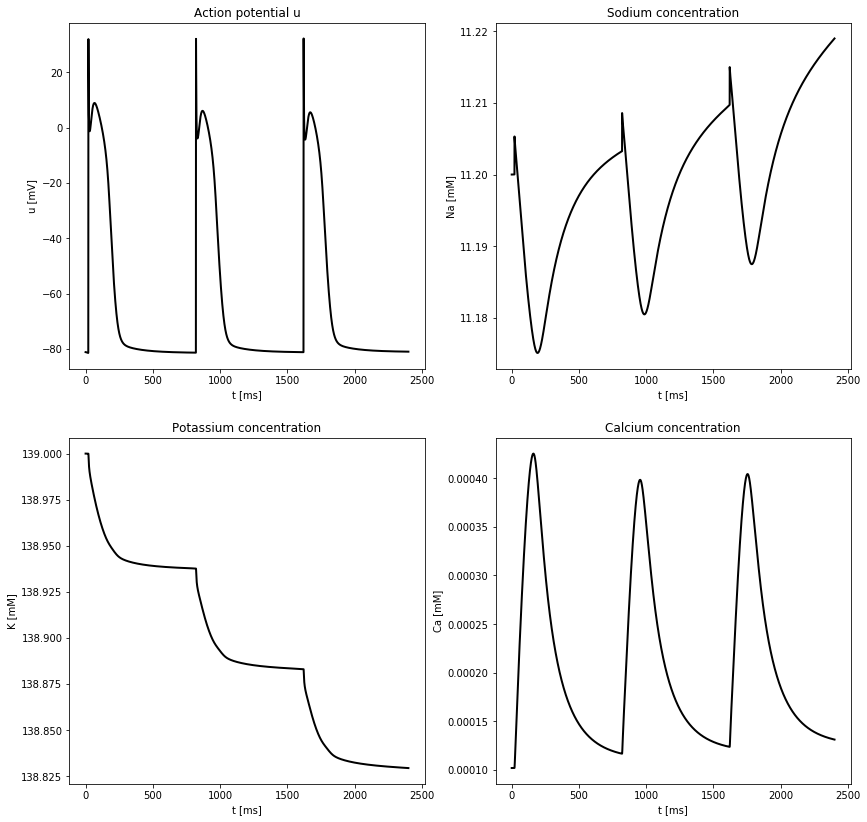

In [16]:
pictures(tt, Y)